## Descripción
- Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten
diariamente telemetría agregada en varios atributos.
- Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la
condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el
mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo
de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_devices = pd.read_csv('../../data/00_raw/full_devices.csv', encoding="latin1")

<b> Empezaremos con los basicos, nulos y despues descriciones generales del dataframe

In [3]:
df_devices.sample(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
34638,2015-02-14,W1F0KCN8,0,147844280,0,0,0,6,321390,0,0,1
28722,2015-02-06,S1F0S351,0,21445640,0,0,0,8,272197,0,0,0
59454,2015-03-23,S1F0R3JV,0,196258752,0,0,0,7,215886,0,0,0


In [4]:
df_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


<b> O que Se tienen acá: </b>
- No Se tienen nulos
- La grande mayoria de nuestros datos son int, Se tienen solo 2 strings <br>
Se va entender un poquito del dataset, distribuciones por supuesto tambien si Se tienen un desbalanceamiento en los failures

In [5]:
df_devices.describe(include='all')

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494,124494,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01,Z1F0QLC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,NaN,NaN,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000


<b> Ya luego Se observa que existe un desbalanceamiento en los failures listo que solo despues de nuestro Q3 Se tienen dados con fallas </b>
- Se necesita entender un poco mejor como está eso, Se tienen 1169 devices, es posible que todos tengan fallas o tienen devices que no contienen fallas?

In [6]:
df_devices.groupby(['device', 
                    'failure']).agg({'failure':'count'})

failure
device   failure         
S1F01085 0              6
S1F013BB 0              6
S1F0166B 0              6
S1F01E6Y 0             48
S1F01JE0 0              6
...                   ...
Z1F1VQFY 0            124
         1              1
Z1F26YZB 0             84
Z1F282ZV 0             84
Z1F2PBHX 0             83

[1275 rows x 1 columns]

<b> Pues existen muchos devices que no contienen fallas </b>
- Cuantos devices contienen fallas?

In [7]:
df_devices.loc[df_devices['failure'] == 1,'device'].nunique()

106

In [8]:
df_devices.loc[df_devices['failure'] == 1].shape[0] / len(df_devices)

0.000851446656063746

<b> De los 1169 solo 106 tuvieran fallas </b>
- Ese es el numero de lineas que tuvieran fallas tambien
- ~0.001% de nuestro dataset tiene fallas.

<b> Cual es nuestro range de datas para los datos? </b>

In [9]:
df_devices['date'].min()

'2015-01-01'

In [10]:
df_devices['date'].max()

'2015-11-02'

<B> Se tienen datos de 11 meses </b>
- Eso nos abre oportunidad de crear series temporales para hacer una analise de anomalias arriba de los atributos -- Pero Se tienen muchas variables y muchos devices, talvez alguna cosa un poquito mas simples como:
    - Una arbore de decisiones para classificacion
    - Una regression logistica para classificacion
- Por ahora son las ideas que tengo

### Se va ahora para correlacion entre as variables para entender se Se tienen que tratar de multicolinearidade

In [11]:
# Compute correlation matrix
corr = df_devices.corr(numeric_only=True)

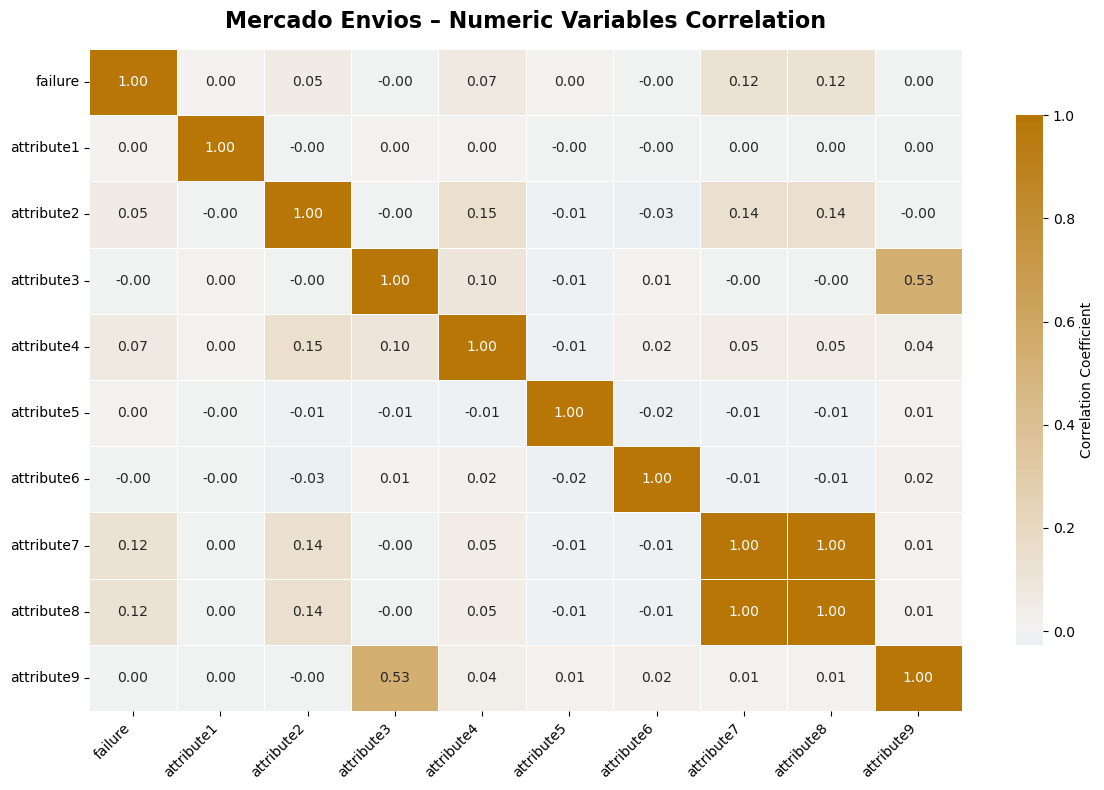

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define a Mercado Livre-inspired palette: deep blue to yellow
cmap = sns.diverging_palette(230, 45, s=99, l=55, as_cmap=True)  

# Create heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Titles and styling
plt.title("Mercado Envios – Numeric Variables Correlation", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

<b> Analise de la correlacion </b>
- Failure tiene correlacion 0 con algunas variables, pero en Machine Learning puede existir correlacion entre variables y por eso no Se podrá descartalas
- De principio attribute 7 y 8 son la misma variable y ya Se podrá deletar
- Attribute 3 y 9 tienen una alta correlacion y ningun tiene correlacion con failure, Se va dejarlos por ahora pero Se va entender un poquito mejor

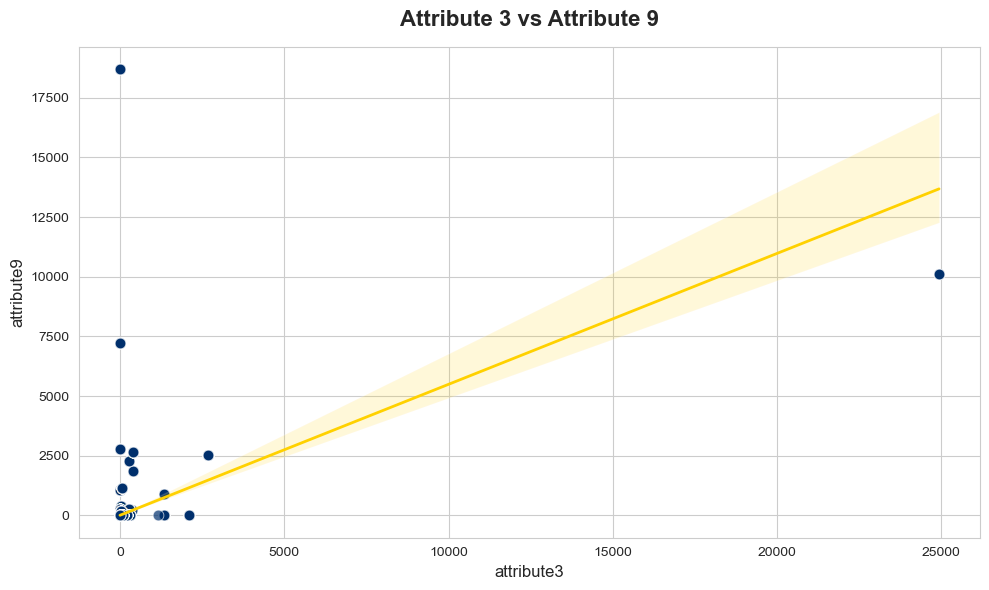

In [13]:
# Scatter plot: attribute_3 vs attribute_9
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_devices,
    x="attribute3",
    y="attribute9",
    color="#002F6C",
    edgecolor="white",
    s=60,                  # Point size
    alpha=0.7              # Transparency for overlap
)

# Titles and labels
plt.title("Attribute 3 vs Attribute 9", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Attribute 3", fontsize=12)
plt.ylabel("Attribute 9", fontsize=12)

# Optional regression line
sns.regplot(
    data=df_devices,
    x="attribute3",
    y="attribute9",
    scatter=False,
    color="#FFD100",       # Mercado yellow
    line_kws={"linewidth": 2}
)

plt.tight_layout()
plt.show()

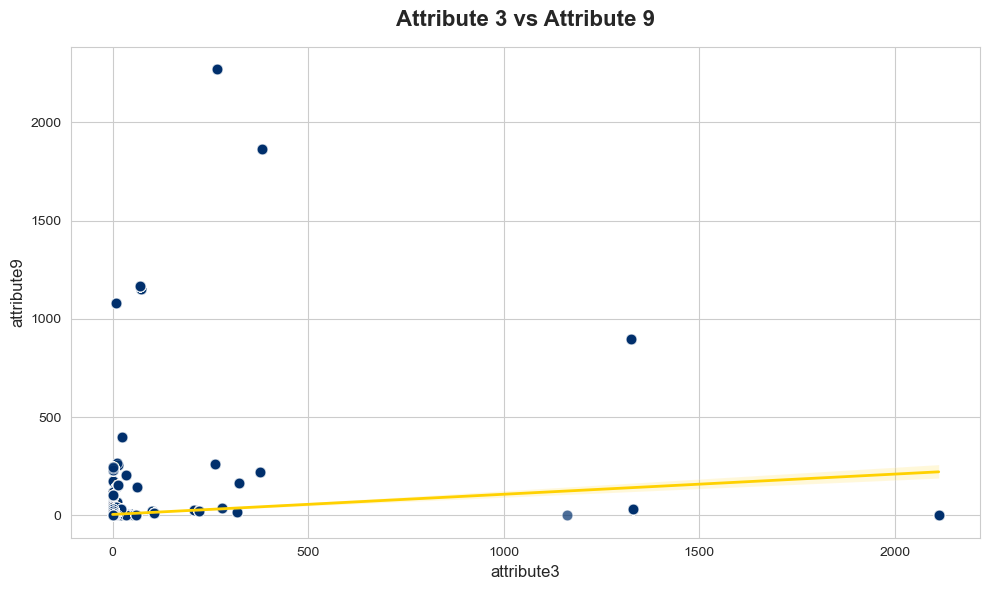

In [14]:
# Scatter plot: attribute_3 vs attribute_9
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_devices.loc[df_devices['attribute9'] < 2500],
    x="attribute3",
    y="attribute9",
    color="#002F6C",
    edgecolor="white",
    s=60,                  # Point size
    alpha=0.7              # Transparency for overlap
)

# Titles and labels
plt.title("Attribute 3 vs Attribute 9", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Attribute 3", fontsize=12)
plt.ylabel("Attribute 9", fontsize=12)

# Optional regression line
sns.regplot(
    data=df_devices.loc[df_devices['attribute9'] < 2500],
    x="attribute3",
    y="attribute9",
    scatter=False,
    color="#FFD100",       # Mercado yellow
    line_kws={"linewidth": 2}
)

plt.tight_layout()
plt.show()

In [15]:
df_devices.loc[df_devices['attribute3']> 20000]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
27,2015-01-01,S1F04KSC,0,105234552,392,24929,529,3,339205,0,0,10137
1190,2015-01-02,S1F04KSC,0,209131472,392,24929,529,3,339205,0,0,10137
2353,2015-01-03,S1F04KSC,0,189393960,392,24929,529,3,339205,0,0,10137
3516,2015-01-04,S1F04KSC,0,243217648,392,24929,529,3,339302,0,0,10137


In [16]:
df_devices.loc[df_devices['attribute9']> 17000]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
1145,2015-01-01,Z1F1AGW1,0,171637640,0,0,0,7,279827,0,0,18701
2308,2015-01-02,Z1F1AGW1,0,191913592,0,0,0,7,281136,0,0,18701
3471,2015-01-03,Z1F1AGW1,0,215848672,0,0,0,7,282454,0,0,18701
4633,2015-01-04,Z1F1AGW1,0,238702720,0,0,0,7,283818,0,0,18701
5794,2015-01-05,Z1F1AGW1,0,19586528,0,0,0,7,285117,0,0,18701


<b> Es Es Es interesante que muchas vezes lo device esta siempre reportando lo mismo, todos los dias </b>
- Por más que exista una correlacion no es tán visible y si existen puntos que son muy distintos en comportamiento

In [17]:
df_devices['date'] = pd.to_datetime(df_devices['date'])

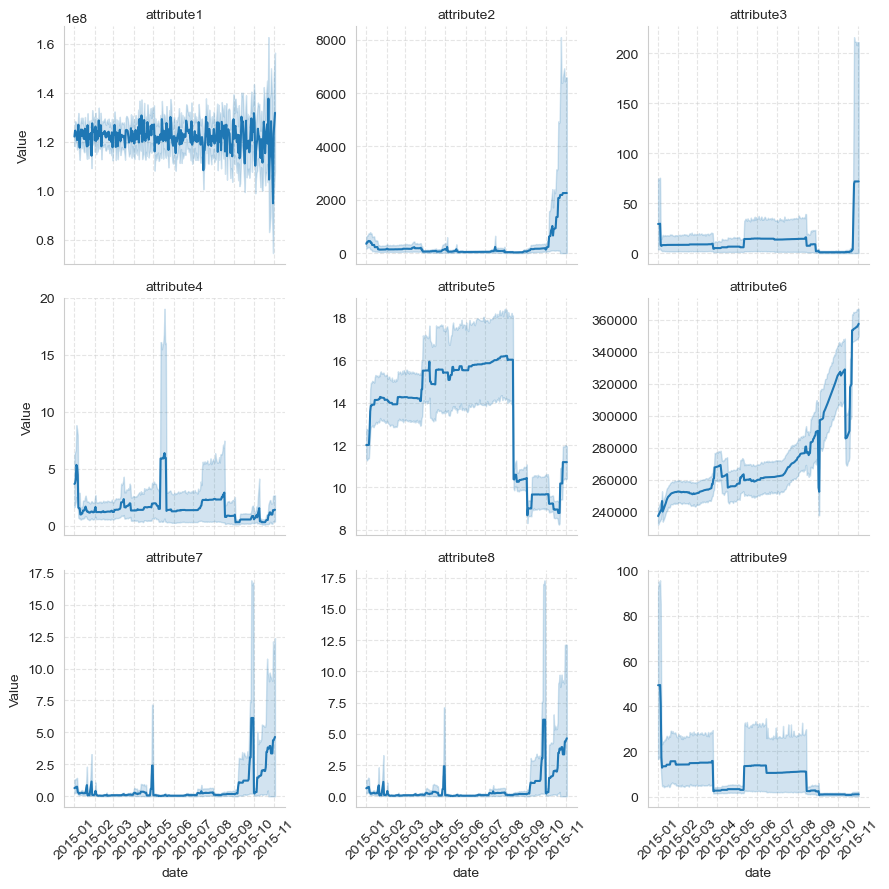

In [18]:
# Select only the attributes you want to plot
attributes = [col for col in df_devices.columns if col not in ['date', 'device', 'failure']]

# Melt DataFrame to long format
df_melted = df_devices.melt(id_vars='date', value_vars=attributes,
                    var_name='Attribute', value_name='Value')

# Create facet grid: one plot per attribute
g = sns.FacetGrid(df_melted, col="Attribute", col_wrap=3, sharex=True, sharey=False, height=3)
g.map(sns.lineplot, "date", "Value")

# Formatting
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Se observan tendencias claras y puntos de cambio abruptos en varios atributos, especialmente incrementos pronunciados hacia el final del periodo. Algunos atributos mantienen valores estables gran parte del tiempo y luego presentan picos repentinos, lo que podría indicar eventos previos a fallas. También hay variabilidad creciente en ciertos casos, señalando posible degradación progresiva.